In [2]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from pathlib import Path

ModuleNotFoundError: No module named 'pandas'

In [150]:
path = "./outputs/client_5/2024-01-20/23-35-20"

In [151]:
date_time_format = "%Y-%m-%d %H:%M:%S"

energy = pd.read_csv(path+"/energy.csv", parse_dates=["timestamp"],date_parser=lambda x: pd.to_datetime(x, format=date_time_format))
energy["timestamp"] = energy["timestamp"].dt.round("1s")

fittimes = pd.read_csv(path+"/fittimes.csv", parse_dates=["Start Time", "End Time"],date_parser=lambda x: pd.to_datetime(x, format=date_time_format))
fitresults = pd.read_csv(path+"/fitresult.csv",parse_dates=["time"],date_parser=lambda x: pd.to_datetime(x, format=date_time_format))

In [152]:
st_rows = energy[energy["timestamp"].isin(fittimes["Start Time"])].reset_index(drop=True)
en_rows = energy[energy["timestamp"].isin(fittimes["End Time"])].reset_index(drop=True)
filtered_rows = energy[~energy["timestamp"].isin(pd.concat([st_rows["timestamp"], en_rows["timestamp"]]))].reset_index(drop=True)

In [153]:
filtered_rows

,timestamp,RAM%,GPU%,GPU inst power,GPU avg power,CPU%,CPU inst power,CPU avg power,tot inst power,tot avg power
0,2024-01-20 23:35:22,0.065309,0.0,0.00,0.00,7.750,24.01,24.01,79.37,79.37
1,2024-01-20 23:35:23,0.065316,0.0,0.00,0.00,8.250,12.49,18.25,66.91,73.14
2,2024-01-20 23:35:24,0.065316,0.0,0.00,0.00,2.750,10.57,14.41,64.99,69.06
3,2024-01-20 23:35:25,0.066301,0.0,0.00,0.00,7.000,17.29,15.85,72.65,70.85
4,2024-01-20 23:35:26,0.068152,0.0,0.00,0.00,88.625,89.99,52.92,145.25,108.05
...,...,...,...,...,...,...,...,...,...,...
670,2024-01-20 23:47:32,0.124309,98.9,5.76,3.21,8.875,15.37,14.47,78.88,74.50
671,2024-01-20 23:47:33,0.118480,0.0,3.84,3.52,11.000,20.17,17.32,82.16,78.32
672,2024-01-20 23:47:34,0.118728,0.0,3.84,3.68,16.500,24.96,21.14,86.95,82.63
673,2024-01-20 23:47:35,0.067751,0.0,3.84,3.76,12.000,16.33,18.73,77.92,80.27


In [154]:
st_rows

,timestamp,RAM%,GPU%,GPU inst power,GPU avg power,CPU%,CPU inst power,CPU avg power,tot inst power,tot avg power
0,2024-01-20 23:35:47,0.080664,0.0,0.00,0.00,3.000,10.57,10.61,64.99,65.02
1,2024-01-20 23:36:20,0.123747,99.0,5.76,3.28,9.625,16.33,14.50,79.44,74.22
2,2024-01-20 23:36:42,0.124009,0.0,0.00,1.59,2.750,10.57,10.86,64.99,67.39
3,2024-01-20 23:37:06,0.124211,0.0,3.84,2.69,7.125,17.29,14.06,77.68,72.38
4,2024-01-20 23:37:29,0.124267,14.5,0.96,1.52,5.500,17.29,14.13,74.03,70.93
5,2024-01-20 23:37:53,0.124315,96.0,7.69,4.46,8.250,17.29,14.05,82.33,75.00
6,2024-01-20 23:38:16,0.124236,16.1,1.92,1.72,5.375,17.29,14.06,74.99,71.14
7,2024-01-20 23:38:39,0.124243,16.4,0.96,1.76,5.500,17.29,14.15,74.42,72.09
8,2024-01-20 23:39:02,0.124265,15.6,0.96,1.32,5.750,17.29,14.10,74.42,71.34
9,2024-01-20 23:39:25,0.124301,0.0,0.00,0.89,3.375,10.57,10.75,65.95,67.17


In [145]:
en_rows

,timestamp,RAM%,GPU%,GPU inst power,GPU avg power,CPU%,CPU inst power,CPU avg power,tot inst power,tot avg power
0,2024-01-20 23:11:44,0.126315,99.4,126.99,127.27,9.500,19.09,19.07,235.36,235.40
1,2024-01-20 23:12:21,0.131749,99.5,122.14,125.25,9.500,19.08,19.19,229.52,233.41
2,2024-01-20 23:12:57,0.130052,0.8,131.68,129.53,9.875,19.08,19.05,241.36,238.40
3,2024-01-20 23:13:32,0.129972,99.4,127.86,127.61,10.000,19.08,19.08,235.24,235.33
4,2024-01-20 23:14:07,0.132055,21.4,129.77,127.85,9.375,20.03,19.69,239.44,236.58
5,2024-01-20 23:14:42,0.128983,99.5,122.14,125.88,9.125,19.08,19.23,229.52,234.18
6,2024-01-20 23:15:17,0.128963,99.5,125.95,126.55,10.000,19.08,19.48,233.33,234.52
7,2024-01-20 23:15:52,0.131950,99.7,124.05,126.77,9.875,19.08,19.08,231.43,234.92
8,2024-01-20 23:16:29,0.132093,99.5,129.86,128.82,9.875,19.09,19.39,239.59,238.06
9,2024-01-20 23:17:06,0.130174,20.2,129.77,128.98,9.625,19.08,19.42,239.48,238.54


<AxesSubplot:>

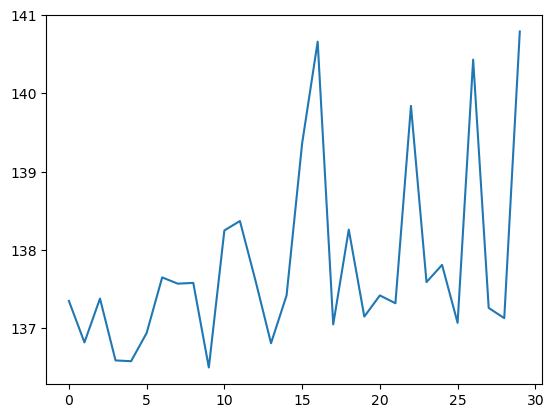

In [157]:
en_rows[" tot avg power"].plot()

<AxesSubplot:>

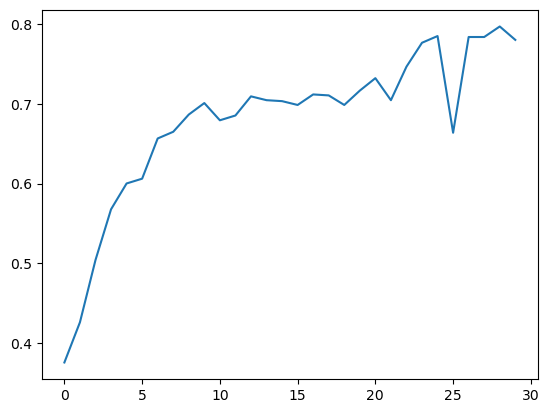

In [148]:
fitresults.val_acc.plot()